In [1]:
ls ./data/cannon_models/*.csv

./data/cannon_models/rchip_order_stats.csv


In [4]:
# replace order column

import pandas as pd
#df_old = pd.read_csv('./data/cannon_models/rchip_order_stats_pre_mask.csv')
df_new = pd.read_csv('./data/cannon_models/rchip_order_stats.csv')

In [28]:
order_values = np.arange(1,17,1)
order_values = np.append(order_values, [17,18])
order_values_ext = np.array([n for n in order_values for _ in range(4)])
df_new['order'] = order_values_ext
df_new

,order,label,bias,rms,model
0,1,steff,11.915,61.122,order1
1,1,slogg,0.001,0.087,order1
2,1,smet,0.002,0.039,order1
3,1,svsini,-0.032,0.615,order1
4,2,steff,15.210,68.704,order2
...,...,...,...,...,...
67,17,svsini,-0.011,0.591,all_orders
68,18,steff,13.254,56.634,orders_11-12_omitted
69,18,slogg,-0.002,0.059,orders_11-12_omitted
70,18,smet,-0.000,0.033,orders_11-12_omitted


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


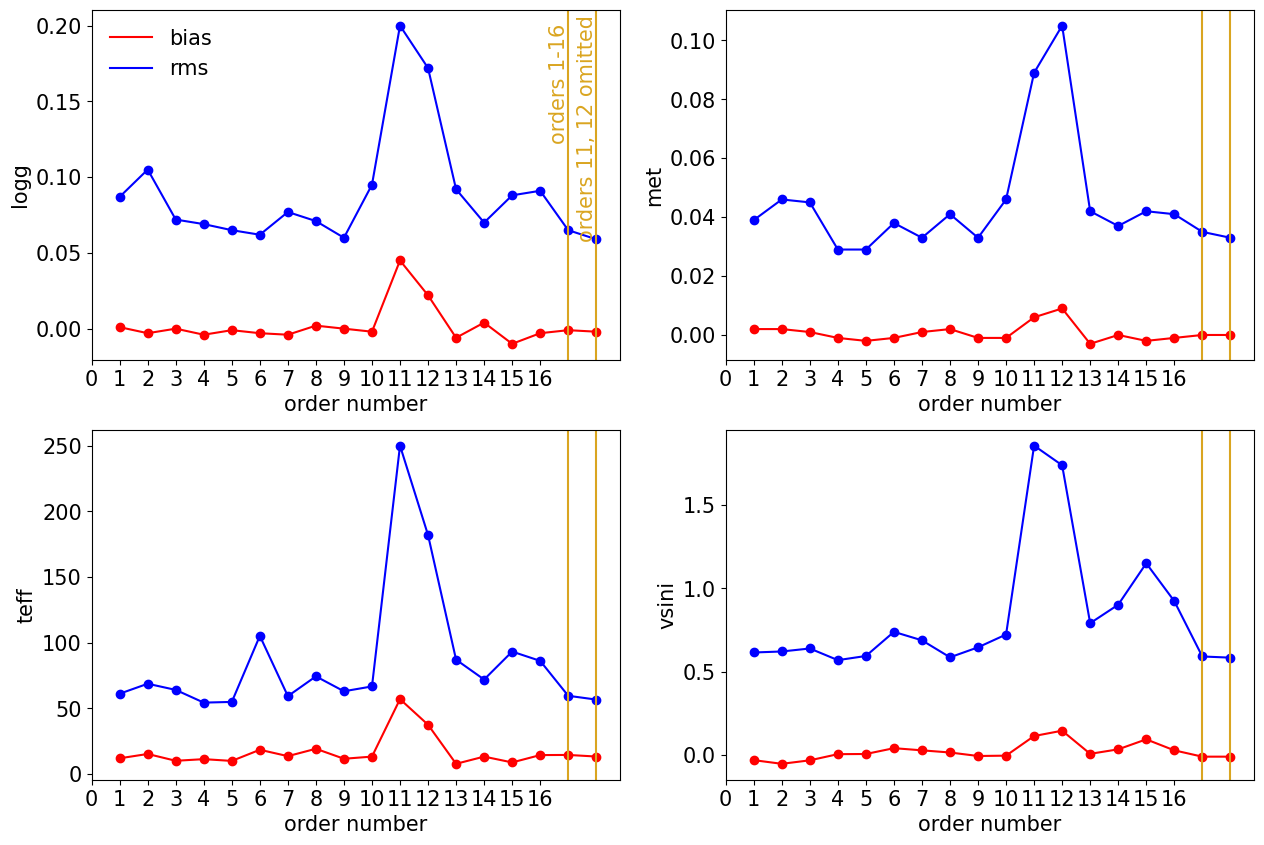

In [39]:
# can I plot teff for 1 order?
# it's just a single value

%pylab inline
figure(figsize=(15,10))
rcParams['font.size']=15
label_strings = np.unique(df_new.label.to_numpy())
for i in range(len(label_strings)):
    subplot(2,2,i+1)
    label_str = label_strings[i]
    df_label = df_new.query('label == @label_str')
    plot(df_label.order, df_label.bias, 'ro')
    plot(df_label.order, df_label.bias, 'r-', label='bias')

    plot(df_label.order, df_label.rms, 'bo')
    plot(df_label.order, df_label.rms, 'b-', label='rms')
    
    # plot the combined orders
    axvline(17, color='goldenrod')
    axvline(18, color='goldenrod')
    
    xticks(ticks=np.arange(0,17,1))
    ylabel(label_str[1:])
    xlabel('order number')
    
    if i==0:
        legend(frameon=False)
        
    if label_str=='slogg':
        text(16.3,0.125,'orders 1-16', rotation=90, color='goldenrod')
        text(17.3,0.06,'orders 11, 12 omitted', rotation=90, color='goldenrod')